In [ ]:
import os
import sys

import torch
import torchvision

from multiprocessor import *
from transforms import *

## Directories

In [ ]:
src_dir = "/media/gcodes/Data/diabetic-retinopathy-detection"
os.listdir(src_dir)

In [ ]:
dest_dir = "/media/gcodes/NVME/diabetic-retinopathy-detection/data"
if not os.path.exists(dest_dir):
    os.makedirs(dest_dir)
os.listdir(dest_dir)

## Make file lists

In [ ]:
src_csv = os.path.join(src_dir, "trainLabels.csv")
src_csv

In [ ]:
import csv
import numpy as np

reader = csv.reader(open(src_csv,'r').readlines())
labels = np.array([e for e in reader][1:])
labels = labels[np.random.permutation(len(labels))]  # shuffle

# split
train_ratio = 0.8
train_num = int(len(labels) * train_ratio)
train_labels = labels[:train_num]
val_labels = labels[train_num:]

In [ ]:
# path_prefix = "data/dr_imgs"
path_prefix = ""

In [ ]:
with open(os.path.join(dest_dir, "x_train.txt"),'w') as f:
    for i in range(len(train_labels)):
        f.write(os.path.join(path_prefix, "{}.jpeg".format(train_labels[i,0])) + "\n")
with open(os.path.join(dest_dir, "t_train.txt"),'w') as f:
    for i in range(len(train_labels)):
        f.write("{}\n".format(train_labels[i,1]))

In [ ]:
with open(os.path.join(dest_dir, "x_val.txt"),'w') as f:
    for i in range(len(val_labels)):
        f.write(os.path.join(path_prefix, "{}.jpeg".format(val_labels[i,0])) + "\n")
with open(os.path.join(dest_dir, "t_val.txt"),'w') as f:
    for i in range(len(val_labels)):
        f.write("{}\n".format(val_labels[i,1]))

## Transform images

In [1]:
import os
import sys
import time

import imageio
import torch
import torchvision

from multiprocessor import *
from transforms import *

In [2]:
# img_src_dir = os.path.join(src_dir, "train")
img_src_dir = "/media/gcodes/Data/diabetic-retinopathy-detection/train"
img_dest_dir = "/media/gcodes/NVME/diabetic-retinopathy-detection/data/dr_imgs"
if not os.path.exists(img_dest_dir):
    os.makedirs(img_dest_dir)

In [3]:
x_transform = torchvision.transforms.Compose([
    DownsampleShortAxis(512),
    PadOrCenterCrop((512,512)),
])

def transform(e):
    x = imageio.imread(os.path.join(img_src_dir,e))
    x = x_transform(x)
    x = (x*255).astype(np.uint8)
    imageio.imwrite(os.path.join(img_dest_dir,e), x)

In [4]:
imgs = os.listdir(img_src_dir)

In [5]:
processor = MultiProcessor(transform, imgs)

In [6]:
processor.run()
while not processor.is_complete():
    print(processor.stats, end='\r')
    time.sleep(0.1)

# Tests

In [1]:
import os
import imageio
import cv2
import matplotlib.pyplot as plt

import torchvision

from transforms import *

img_src_dir = "/media/gcodes/Data/diabetic-retinopathy-detection/train"

CPU times: user 112 ms, sys: 12.3 ms, total: 125 ms
Wall time: 125 ms


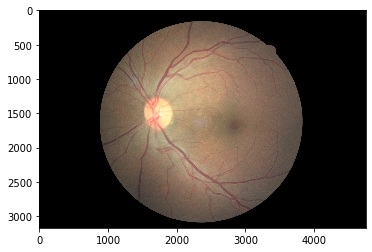

/media/gcodes/Data/diabetic-retinopathy-detection/train/10003_left.jpeg
CPU times: user 100 ms, sys: 20.2 ms, total: 121 ms
Wall time: 121 ms


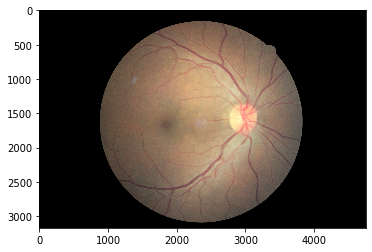

/media/gcodes/Data/diabetic-retinopathy-detection/train/10003_right.jpeg
CPU times: user 52.4 ms, sys: 6.15 ms, total: 58.6 ms
Wall time: 58.7 ms


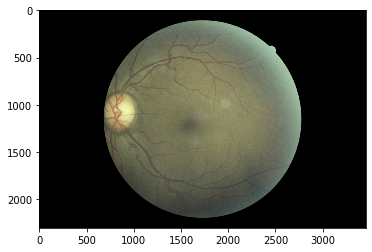

/media/gcodes/Data/diabetic-retinopathy-detection/train/10007_left.jpeg
CPU times: user 59 ms, sys: 0 ns, total: 59 ms
Wall time: 59.1 ms


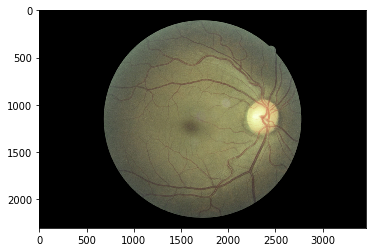

/media/gcodes/Data/diabetic-retinopathy-detection/train/10007_right.jpeg
CPU times: user 79.8 ms, sys: 3.96 ms, total: 83.8 ms
Wall time: 83.8 ms


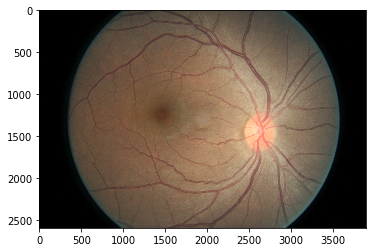

/media/gcodes/Data/diabetic-retinopathy-detection/train/10009_left.jpeg
CPU times: user 76.4 ms, sys: 8.22 ms, total: 84.6 ms
Wall time: 87.7 ms


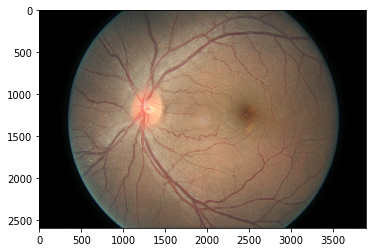

/media/gcodes/Data/diabetic-retinopathy-detection/train/10009_right.jpeg
CPU times: user 87.8 ms, sys: 3.94 ms, total: 91.7 ms
Wall time: 94.4 ms


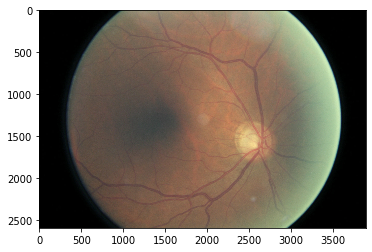

/media/gcodes/Data/diabetic-retinopathy-detection/train/1000_left.jpeg
CPU times: user 78.2 ms, sys: 9.09 ms, total: 87.3 ms
Wall time: 88.9 ms


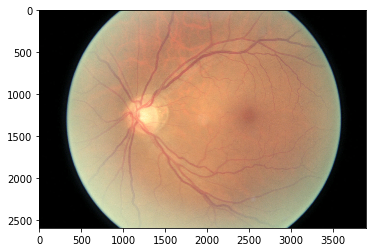

/media/gcodes/Data/diabetic-retinopathy-detection/train/1000_right.jpeg
CPU times: user 81.5 ms, sys: 765 µs, total: 82.2 ms
Wall time: 82.4 ms


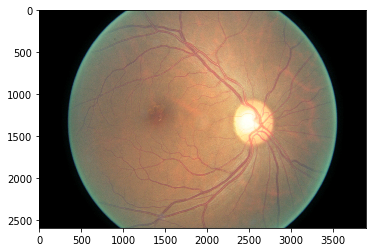

/media/gcodes/Data/diabetic-retinopathy-detection/train/10010_left.jpeg
CPU times: user 80.1 ms, sys: 4.12 ms, total: 84.3 ms
Wall time: 84.3 ms


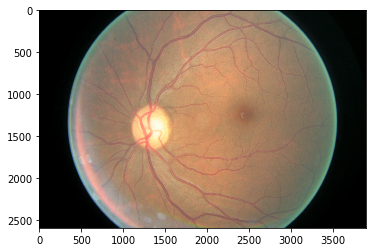

/media/gcodes/Data/diabetic-retinopathy-detection/train/10010_right.jpeg
CPU times: user 83.5 ms, sys: 27.8 ms, total: 111 ms
Wall time: 111 ms


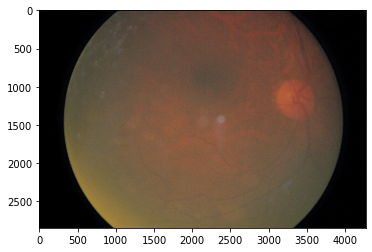

/media/gcodes/Data/diabetic-retinopathy-detection/train/10013_left.jpeg
CPU times: user 95.6 ms, sys: 15.9 ms, total: 111 ms
Wall time: 111 ms


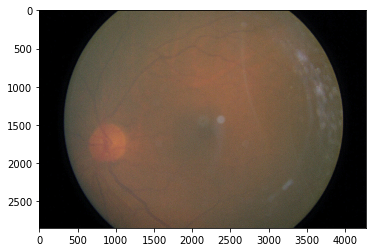

/media/gcodes/Data/diabetic-retinopathy-detection/train/10013_right.jpeg


In [10]:
transform = torchvision.transforms.Compose([
#     CLAHE(1.0, (10,10)),
    lambda x: x/255,
])

for i, f in enumerate(os.listdir(img_src_dir)):
    path = os.path.join(img_src_dir, f)
    %time img = cv2.imread(path)[...,::-1]
    img = transform(img)
    plt.imshow(img)
    plt.show()
    print(path)
    if i > 10: break